# 6.4 Machine Learning Part 1 

## 1. Importing libraries and data
## 2. Data cleaning
## 3. Data prep for regression analysis
## 4. Regression analysis

## 1. Importing libraries and data

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [6]:
path = r'C:\Users\User\250104_Global Internet Access Analysis'

In [7]:
df_internet= df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared data', 'final_dataset.csv'))

## 2. Data cleaning

In [9]:
df_internet.columns

Index(['Unnamed: 0', 'Country Name', 'Country Code', 'Region', 'IncomeGroup',
       'Year', 'Internet_Users', 'GDP_Per_Capita', 'Electricity_Access',
       'Electricity_Access_Rural', 'Electricity_Access_Urban',
       'Broadband_Subscriptions', 'Life_Expectancy', 'Sec_Edu_Duration',
       'Literacy_Female', 'Literacy_Male', 'Literacy_Total', 'Pop_0_14',
       'Pop_15_64', 'Pop_65_Above', 'Pop_Female', 'Pop_Male', 'Pop_Total',
       'Pop_Rural', 'Pop_Urban'],
      dtype='object')

In [10]:
df_internet.drop(columns= ['Unnamed: 0'], inplace = True)

In [11]:
df_internet.head()

,Country Name,Country Code,Region,IncomeGroup,Year,Internet_Users,GDP_Per_Capita,Electricity_Access,Electricity_Access_Rural,Electricity_Access_Urban,...,Literacy_Male,Literacy_Total,Pop_0_14,Pop_15_64,Pop_65_Above,Pop_Female,Pop_Male,Pop_Total,Pop_Rural,Pop_Urban
0,Afghanistan,AFG,South Asia,Low income,2012,5.45455,1988.429304,69.1,60.8,95.0,...,85.479461,81.376306,47.605305,50.056783,2.337911,49.499771,50.500229,30560034.0,75.840,24.160
1,Afghanistan,AFG,South Asia,Low income,2013,5.90000,2133.241271,68.0,60.2,92.2,...,85.479461,81.376306,47.161386,50.488845,2.349769,49.482650,50.517350,31622704.0,75.627,24.373
2,Afghanistan,AFG,South Asia,Low income,2014,7.00000,2224.490748,89.5,86.5,98.7,...,85.479461,81.376306,46.713066,50.930398,2.356536,49.468115,50.531885,32792523.0,75.413,24.587
3,Afghanistan,AFG,South Asia,Low income,2015,8.26000,2284.075848,71.5,64.6,92.5,...,50.212101,33.753841,46.259337,51.383968,2.356695,49.457202,50.542798,33831764.0,75.197,24.803
4,Afghanistan,AFG,South Asia,Low income,2016,11.00000,2213.181441,97.7,97.1,99.5,...,85.479461,81.376306,45.801449,51.843054,2.355497,49.449550,50.550450,34700612.0,74.980,25.020


In [12]:
df_internet.shape

(2175, 24)

In [13]:
df_internet.rename(columns = {'Country Name' : 'Country_Name', 'Country Code': 'Country_Code', 'IncomeGroup' : 'Income_Group'}, inplace= True)

In [14]:
df_internet.head()

,Country_Name,Country_Code,Region,Income_Group,Year,Internet_Users,GDP_Per_Capita,Electricity_Access,Electricity_Access_Rural,Electricity_Access_Urban,...,Literacy_Male,Literacy_Total,Pop_0_14,Pop_15_64,Pop_65_Above,Pop_Female,Pop_Male,Pop_Total,Pop_Rural,Pop_Urban
0,Afghanistan,AFG,South Asia,Low income,2012,5.45455,1988.429304,69.1,60.8,95.0,...,85.479461,81.376306,47.605305,50.056783,2.337911,49.499771,50.500229,30560034.0,75.840,24.160
1,Afghanistan,AFG,South Asia,Low income,2013,5.90000,2133.241271,68.0,60.2,92.2,...,85.479461,81.376306,47.161386,50.488845,2.349769,49.482650,50.517350,31622704.0,75.627,24.373
2,Afghanistan,AFG,South Asia,Low income,2014,7.00000,2224.490748,89.5,86.5,98.7,...,85.479461,81.376306,46.713066,50.930398,2.356536,49.468115,50.531885,32792523.0,75.413,24.587
3,Afghanistan,AFG,South Asia,Low income,2015,8.26000,2284.075848,71.5,64.6,92.5,...,50.212101,33.753841,46.259337,51.383968,2.356695,49.457202,50.542798,33831764.0,75.197,24.803
4,Afghanistan,AFG,South Asia,Low income,2016,11.00000,2213.181441,97.7,97.1,99.5,...,85.479461,81.376306,45.801449,51.843054,2.355497,49.449550,50.550450,34700612.0,74.980,25.020


In [15]:
# Check for missing values

df_internet.isnull().sum()

# No missing values to handle

Country_Name                  0
Country_Code                  0
Region                      391
Income_Group                391
Year                          0
Internet_Users                0
GDP_Per_Capita                0
Electricity_Access            0
Electricity_Access_Rural      0
Electricity_Access_Urban      0
Broadband_Subscriptions       0
Life_Expectancy               0
Sec_Edu_Duration              0
Literacy_Female               0
Literacy_Male                 0
Literacy_Total                0
Pop_0_14                      0
Pop_15_64                     0
Pop_65_Above                  0
Pop_Female                    0
Pop_Male                      0
Pop_Total                     0
Pop_Rural                     0
Pop_Urban                     0
dtype: int64

In [16]:
dups = df_internet.duplicated()

In [17]:
dups

0       False
1       False
2       False
3       False
4       False
        ...  
2170    False
2171    False
2172    False
2173    False
2174    False
Length: 2175, dtype: bool

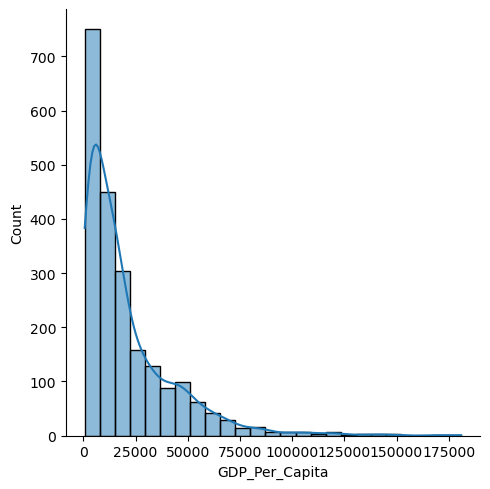

In [51]:
#Extreme values check
sns.displot(df_internet['GDP_Per_Capita'], bins=25, kde=True)
plt.show()


In [53]:
# Remove outliers 
Q1 = df_internet['GDP_Per_Capita'].quantile(0.25)
Q3 = df_internet['GDP_Per_Capita'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for non-outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_filtered = df_internet[(df_internet['GDP_Per_Capita'] >= lower_bound) & 
                           (df_internet['GDP_Per_Capita'] <= upper_bound)]


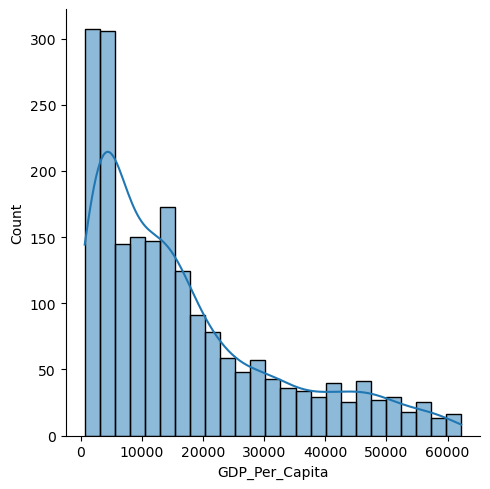

In [55]:
# Check
sns.displot(df_filtered['GDP_Per_Capita'], bins=25, kde=True)
plt.show()

## 3. Data prep for regression analysis

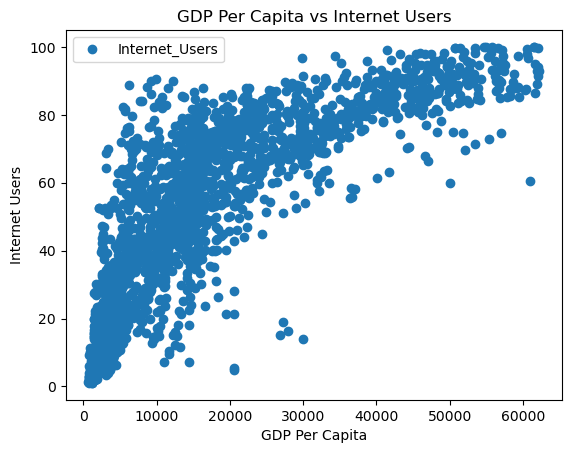

In [59]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_filtered.plot(x = 'GDP_Per_Capita', y='Internet_Users',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('GDP Per Capita vs Internet Users')  
plt.xlabel('GDP Per Capita')  
plt.ylabel('Internet Users')  
# Save the plot
plt.savefig("C:/Users/User/250104_Global Internet Access Analysis/04 Analysis/internet_literacy_scatterplot.png", dpi=300, bbox_inches='tight')
plt.show()

In [73]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_filtered['GDP_Per_Capita'].values.reshape(-1,1)
y = df_filtered['Internet_Users'].values.reshape(-1,1)

In [75]:
X

array([[1988.42930382],
       [2133.24127099],
       [2224.49074815],
       ...,
       [3510.5940359 ],
       [3184.78545139],
       [3560.04327344]])

In [76]:
y

array([[ 5.45455],
       [ 5.9    ],
       [ 7.     ],
       ...,
       [29.2986 ],
       [32.4616 ],
       [32.5615 ]])

In [77]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 4. Regression analysis

In [79]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [80]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [81]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

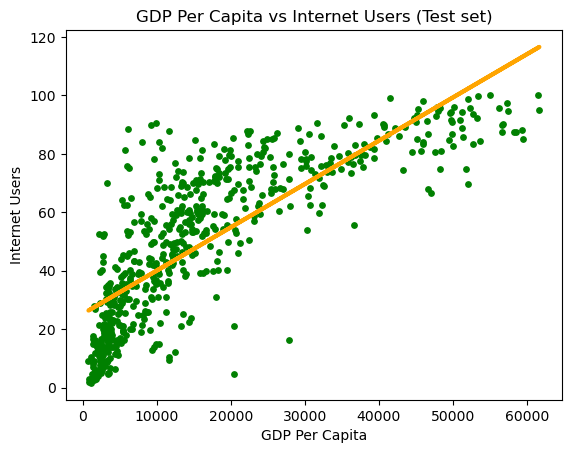

In [99]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='green', s = 15)
plot_test.plot(X_test, y_predicted, color='orange', linewidth =3)
plot_test.title('GDP Per Capita vs Internet Users (Test set)')
plot_test.xlabel('GDP Per Capita')
plot_test.ylabel('Internet Users')
plt.savefig("C:/Users/User/250104_Global Internet Access Analysis/04 Analysis/internet_literacy_regression_line.png", dpi=300, bbox_inches='tight')
plot_test.show()

### Visual Analysis of regression
The orange regression line follows a clear upward trend, indicating a positive relationship between GDP per capita and the number of internet users.
The green scatter points show considerable spread around the line, suggesting that while GDP per capita influences internet usage, other factors may also be at play.
The model does a decent job capturing the overall trend: as GDP per capita increases, internet users tend to increase.
However, some data points deviate significantly from the line, meaning that the model does not explain all the variance in the data, another model might be a better fit.

In [ ]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [84]:
# Print the model summary statistics. This is where performance of the model is evaluated.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00148182]]
Mean squared error:  265.81401967053256
R2 score:  0.6383170708313015


In [85]:
y_predicted

array([[ 39.94430305],
       [ 76.94474941],
       [ 73.57675885],
       [ 45.04503604],
       [ 70.91285956],
       [ 31.16262503],
       [ 51.61737634],
       [ 78.25723215],
       [ 33.18004445],
       [ 30.91221968],
       [ 53.04697439],
       [ 70.09859852],
       [ 95.8476699 ],
       [ 70.68827453],
       [ 29.44955585],
       [ 34.45878686],
       [ 29.4627407 ],
       [ 61.37035033],
       [ 48.13182432],
       [ 45.25230988],
       [ 32.65943749],
       [ 45.80460285],
       [ 68.99668455],
       [ 41.9350435 ],
       [ 39.47345618],
       [ 54.08979971],
       [ 30.2427886 ],
       [ 51.50036263],
       [ 74.09082016],
       [ 30.50926063],
       [ 63.47037719],
       [ 30.96782058],
       [ 33.62269918],
       [ 52.07494836],
       [ 46.66775119],
       [ 45.29734976],
       [ 28.56780577],
       [ 30.78014607],
       [ 30.3549274 ],
       [ 50.6340203 ],
       [ 44.06664869],
       [110.42275897],
       [ 42.42271125],
       [ 58

In [86]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,90.500000,39.944303
1,74.661000,76.944749
2,69.000000,73.576759
3,46.500000,45.045036
4,79.000000,70.912860
5,23.000000,31.162625
6,72.000000,51.617376
7,77.352100,78.257232
8,29.700000,33.180044
9,23.024227,30.912220


### Thoughts on how well the model performed on the test
The Slope (0.00148) means that for every 1 Dollar increase in GDP per capita, the predicted number of internet users increases by approximately 0.0015 (or 1.5 per $1000 GDP). A positive slope indicates a direct relationship: as GDP per capita rises, internet usage tends to increase.
The R² score of 0.638 indicates that the model explains 63.8% of the variance in internet usage based on GDP per capita.
While this suggests that GDP per capita is a strong predictor, 36.2% of the variance remains unexplained, meaning other factors influence internet penetration.
The RMSE of 265.81 suggests that predictions may have significant errors, especially for extreme GDP values.

### Impact of potential data bias
The dataset includes both high-income and low-income nations. Wealthier countries may have fully saturated internet access, whereas in poorer countries, government policies, infrastructure, and education levels could limit internet access.
The model assumes a linear relationship, but in reality, internet penetration might plateau at high GDP levels.

Urban vs. Rural Divide: GDP per capita is an average measure, but internet penetration varies greatly between urban and rural areas.
Countries with a high GDP but large rural populations might have lower-than-expected internet penetration, introducing prediction errors.